# Import Libraries

In [ ]:
#https://github.com/mollha/Sarcasm-Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the Dataset

In [2]:
df=pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [4]:
df['is_sarcastic'].value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

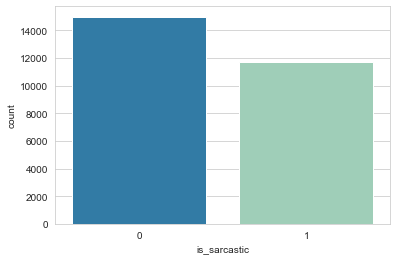

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='is_sarcastic',data=df, palette='YlGnBu_r')

# Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split
X=df['headline'].values
y=df['is_sarcastic'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Tokenization and Padding

In [7]:
vocab_size=10000
embedding_dim=16
max_length=32
trunc_type='post'
padding_type='post'
oov_tok='<oov>'

In [8]:
pip show tensorflow

Name: tensorflow
Version: 2.0.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\mrigank\anaconda3\lib\site-packages
Requires: keras-applications, gast, numpy, tensorflow-estimator, google-pasta, opt-einsum, protobuf, termcolor, absl-py, wrapt, tensorboard, keras-preprocessing, grpcio, six, astor, wheel
Required-by: tensorflow-addons, rasa
Note: you may need to restart the kernel to use updated packages.


In [9]:
#!pip install tensorflow==2.0.0

In [11]:
!pip install keras

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer= Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index=tokenizer.word_index
print(len(word_index))
print(word_index)

training_sequences=tokenizer.texts_to_sequences(X_train)
training_padded=pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(training_padded[0])
print(training_padded.shape)

testing_sequences=tokenizer.texts_to_sequences(X_test)
testing_padded=pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

24785
{'<oov>': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'from': 15, 'at': 16, 'about': 17, 'you': 18, 'this': 19, 'by': 20, 'up': 21, 'be': 22, 'after': 23, 'out': 24, 'how': 25, 'it': 26, 'that': 27, 'as': 28, 'not': 29, 'your': 30, 'are': 31, 'his': 32, 'what': 33, 'he': 34, 'has': 35, 'just': 36, 'will': 37, 'all': 38, 'who': 39, 'one': 40, 'more': 41, 'into': 42, 'why': 43, 'donald': 44, 'report': 45, 'area': 46, 'year': 47, 'have': 48, 'over': 49, 'can': 50, 'u': 51, 's': 52, 'day': 53, 'says': 54, 'woman': 55, 'first': 56, 'her': 57, 'time': 58, "trump's": 59, 'an': 60, 'off': 61, 'no': 62, 'like': 63, 'old': 64, 'obama': 65, 'get': 66, 'life': 67, 'now': 68, 'people': 69, 'make': 70, "'": 71, 'was': 72, 'than': 73, 'if': 74, 'still': 75, 'i': 76, 'house': 77, 'down': 78, 'when': 79, 'my': 80, 'back': 81, 'women': 82, 'white': 83, 'world': 84, 'could': 85, 'clinton': 86, '5': 87, 'we': 8

[ 252   91 1770  298    2 1576  801    3 2112   20    1    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
(18696, 32)


# Building the Model with Word Embedding

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten

In [11]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Flatten())

model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            160000    
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                16416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [13]:
model.fit(x=training_padded, y=y_train, batch_size=256, epochs=100, validation_data=(testing_padded, y_test), verbose=1, callbacks=[early_stop])

Train on 18696 samples, validate on 8013 samples
Epoch 1/100
18696/18696 [==============================] - 2s 126us/sample - loss: 0.6910 - accuracy: 0.5422 - val_loss: 0.6893 - val_accuracy: 0.5546
Epoch 2/100
18696/18696 [==============================] - 1s 51us/sample - loss: 0.6884 - accuracy: 0.5606 - val_loss: 0.6870 - val_accuracy: 0.5546
Epoch 3/100
18696/18696 [==============================] - 1s 52us/sample - loss: 0.6859 - accuracy: 0.5628 - val_loss: 0.6851 - val_accuracy: 0.5546
Epoch 4/100
18696/18696 [==============================] - 1s 51us/sample - loss: 0.6836 - accuracy: 0.5616 - val_loss: 0.6831 - val_accuracy: 0.5546
Epoch 5/100
18696/18696 [==============================] - 1s 44us/sample - loss: 0.6810 - accuracy: 0.5633 - val_loss: 0.6803 - val_accuracy: 0.5546
Epoch 6/100
18696/18696 [==============================] - 1s 44us/sample - loss: 0.6780 - accuracy: 0.5628 - val_loss: 0.6756 - val_accuracy: 0.5546
Epoch 7/100
18696/18696 [=========================

# Visualization (Loss & Accuracy)

In [17]:
df_m=pd.DataFrame(model.history.history)
df_m['Epoch']=range(1,34)
df_m.index=df_m['Epoch']
df_m

,loss,accuracy,val_loss,val_accuracy,Epoch
Epoch,,,,,
1,0.691048,0.542202,0.689342,0.554599,1
2,0.688371,0.560601,0.686957,0.554599,2
3,0.685944,0.562794,0.685097,0.554599,3
4,0.683608,0.561617,0.683143,0.554599,4
5,0.681029,0.563276,0.680305,0.554599,5
6,0.677997,0.562794,0.675644,0.554599,6
7,0.671210,0.565896,0.667899,0.554599,7
8,0.662321,0.574508,0.657032,0.559091,8
9,0.648589,0.607242,0.636697,0.631224,9


In [18]:
score = model.evaluate(testing_padded, y_test, batch_size=64, verbose=1)
print('Test accuracy:', score[1])

8013/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy: 0.8707101


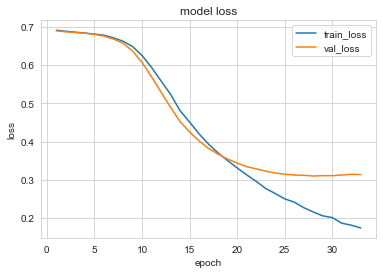

In [19]:
#Loss Graph(Training and Validation)
plt.plot(df_m['loss'])
plt.plot(df_m['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

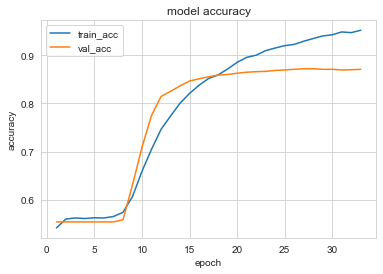

In [20]:
# Accuracy Graph(Training and Validation) 
plt.plot(df_m['accuracy'])
plt.plot(df_m['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'])
plt.show()